In [ ]:
import logging
import os
import pandas as pd
import re
import time

%load_ext autoreload
%autoreload 2

from pathlib import Path

# Disable logging of the program in the notebook
os.environ["LOGLEVEL"] = "INFO"

logging.basicConfig()
logging.root.setLevel(logging.INFO)
logging.basicConfig(level=logging.INFO)

logger = logging.getLogger('__main__')
logger.setLevel(os.environ.get("LOGLEVEL", logging.INFO))

pybooklogger = logging.getLogger('pybook')
pybooklogger.setLevel(logging.INFO)

import sys
sys.path.append(os.path.abspath(os.path.join(os.path.dirname(os.path.abspath("__file__")), '..')))
from setup import *
from tad_help import TadRunner

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [75]:
save_dir = os.path.join(os.path.dirname(os.path.abspath("__file__")), "results", "corridor")
layout = Layout("../data/corridor/corridor_tracks.json")
scenario_file = "../data/corridor/scenario_2trains.json"

tad_exp = TadRunner(layout, scenario_file, save_dir, use_acceleration=False)
experiments = tad_exp.run("1", "o", "U|1", "V|1", timeout=600, offset=0, max_buffer_time=3)

experiments[0].metadata = {'color': 'Red',   'label': '@MAEDeR',    'offset': 0, 'linestyle': 3}
experiments[1].metadata = {'color': 'Blue',  'label': 'FlexSIPP', 'offset': 0, 'linestyle': 3}
experiments[2].metadata = {'color': 'Green', 'label': 'rSIPP',    'offset': 0, 'linestyle': 3}

os.makedirs(save_dir, exist_ok=True)
path_data = get_path_data(experiments, tad_exp.agent_df, scenario=scenario_file)
path_df = pd.DataFrame(path_data)
path_df.to_csv(save_dir + "/corridor.csv")

time_data = [exp.get_running_time() | exp.get_label() | {'scenario': scenario_file} for exp in experiments]
time_df = pd.DataFrame(time_data)
time_df.to_csv(save_dir + "/corridor-time.csv")

comp_data = [exp.get_complexity()   | exp.get_label() | {'scenario': scenario_file} for exp in experiments]
comp_df = pd.DataFrame(comp_data)
comp_df.to_csv(save_dir + "/corridor-comp.csv")

INFO:__main__.generation.graph:Creating initial signals
INFO:__main__.generation.graph:  0%|          | 0/24 [00:00<?, ?it/s]
INFO:__main__.generation.graph:Found 1 routes [([Node suA, Node wA], 100, 100.0)] for signal block from signal Signal u|A on track uA
INFO:__main__.generation.graph:Found 1 routes [([Node uA], 100, 100.0)] for signal block from signal Signal u|B on track uB
INFO:__main__.generation.graph:Found 1 routes [([Node s1A], 100, 100.0)] for signal block from signal Signal w|A on track wA
INFO:__main__.generation.graph:Found 1 routes [([Node suHatA, Node wA], 100, 100.0)] for signal block from signal Signal uHat|A on track uHatA


INFO:__main__.generation.graph:Found 1 routes [([Node uHatA], 100, 100.0)] for signal block from signal Signal uHat|B on track uHatB
INFO:__main__.generation.graph:Found 1 routes [([Node s2A], 100, 100.0)] for signal block from signal Signal s1|A on track s1A
INFO:__main__.generation.graph:Found 2 routes [([Node wBR, Node suB], 100, 100.0), ([Node wBR, Node wBL, Node suHatB], 100, 100.0)] for signal block from signal Signal s1|B on track s1B
INFO:__main__.generation.graph:Found 1 routes [([Node s3A], 100, 100.0)] for signal block from signal Signal s2|A on track s2A
INFO:__main__.generation.graph:Found 1 routes [([Node s1B], 100, 100.0)] for signal block from signal Signal s2|B on track s2B
INFO:__main__.generation.graph:Found 1 routes [([Node s4A], 100, 100.0)] for signal block from signal Signal s3|A on track s3A
INFO:__main__.generation.graph:Found 1 routes [([Node s2B], 100, 100.0)] for signal block from signal Signal s3|B on track s3B
INFO:__main__.generation.graph:Found 1 routes 

Graph with 26 edges and 24 nodes:
dict_values([Node r-u|A, Node r-u|B, Node r-w|A, Node r-uHat|A, Node r-uHat|B, Node r-s1|A, Node r-s1|B, Node r-s2|A, Node r-s2|B, Node r-s3|A, Node r-s3|B, Node r-s4|A, Node r-s4|B, Node r-s5|A, Node r-s5|B, Node r-s6|B, Node r-v|B, Node r-v|A, Node r-vHat|B, Node r-vHat|A, Node r-su|B, Node r-suHat|B, Node r-sv|A, Node r-svHat|A]) r-v|B
Graph with 26 edges and 24 nodes:
dict_values([Node r-u|A, Node r-u|B, Node r-w|A, Node r-uHat|A, Node r-uHat|B, Node r-s1|A, Node r-s1|B, Node r-s2|A, Node r-s2|B, Node r-s3|A, Node r-s3|B, Node r-s4|A, Node r-s4|B, Node r-s5|A, Node r-s5|B, Node r-s6|B, Node r-v|B, Node r-v|A, Node r-vHat|B, Node r-vHat|A, Node r-su|B, Node r-suHat|B, Node r-sv|A, Node r-svHat|A]) r-v|B
Graph with 26 edges and 24 nodes:
dict_values([Node r-u|A, Node r-u|B, Node r-w|A, Node r-uHat|A, Node r-uHat|B, Node r-s1|A, Node r-s1|B, Node r-s2|A, Node r-s2|B, Node r-s3|A, Node r-s3|B, Node r-s4|A, Node r-s4|B, Node r-s5|A, Node r-s5|B, Node r-

INFO:__main__.generation.convert_to_safe_intervals:    Interval (15.01, 36, 2, 0, 0, 0) with index 19
INFO:__main__.generation.convert_to_safe_intervals:Safe intervals on node r-s4|A
INFO:__main__.generation.convert_to_safe_intervals:    Interval (0, 12.0, 0, 2, 0, 0) with index 20
INFO:__main__.generation.convert_to_safe_intervals:    Interval (13.0, 36, 2, 0, 0, 0) with index 21
INFO:__main__.generation.convert_to_safe_intervals:Safe intervals on node r-s4|B
INFO:__main__.generation.convert_to_safe_intervals:    Interval (0, 12.0, 0, 2, 0, 0) with index 22
INFO:__main__.generation.convert_to_safe_intervals:    Interval (14.01, 36, 2, 0, 0, 0) with index 23
INFO:__main__.generation.convert_to_safe_intervals:Safe intervals on node r-s5|A
INFO:__main__.generation.convert_to_safe_intervals:    Interval (0, 11.0, 0, 2, 0, 0) with index 24
INFO:__main__.generation.convert_to_safe_intervals:    Interval (12.0, 36, 2, 0, 0, 0) with index 25
INFO:__main__.generation.convert_to_safe_intervals:

Exp @MAEDeR - atf: <-inf,2.0,4.0,9>
Exp @MAEDeR - atf: <-inf,17.0,27.0,9>
Exp FlexSIPP - atf: <-inf,2.0,4.0,9>
Exp FlexSIPP: Agent_i 2 is delayed and agent ['0.0001', '1', '0', 'r-s5|A', '0'] is other agent which has atf: <-inf,4.0,5.0,9>
Exp FlexSIPP: Agent_i 2 is delayed and agent ['1.0001', '2', '0', 'r-s4|A', '0'] is other agent which has atf: <-inf,5.0,6.0,9>
Exp FlexSIPP: Agent_i 2 is delayed and agent ['2.0001', '3', '0', 'r-s5|A', '2'] is other agent which has atf: <-inf,6.0,7.0,9>
Exp FlexSIPP - atf: <-inf,17.0,27.0,9>
Exp rSIPP - atf: <-inf,2.0,4.0,9>
Exp rSIPP - atf: <-inf,17.0,27.0,9>


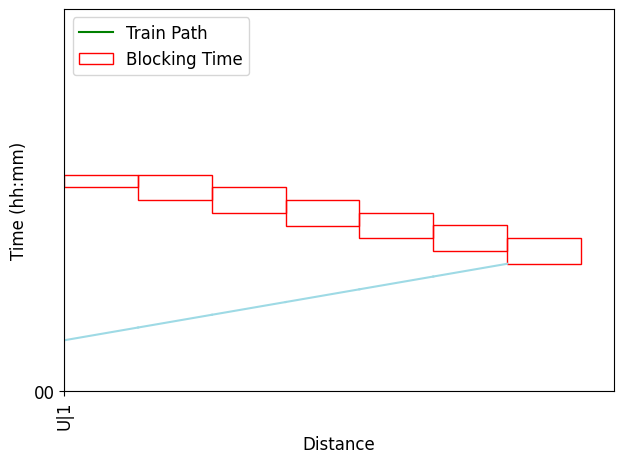

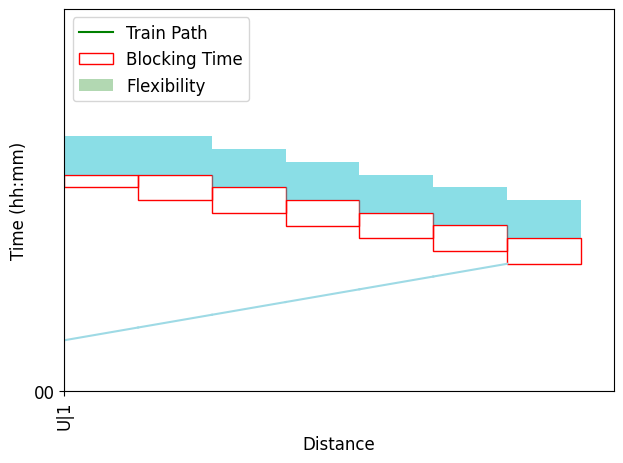

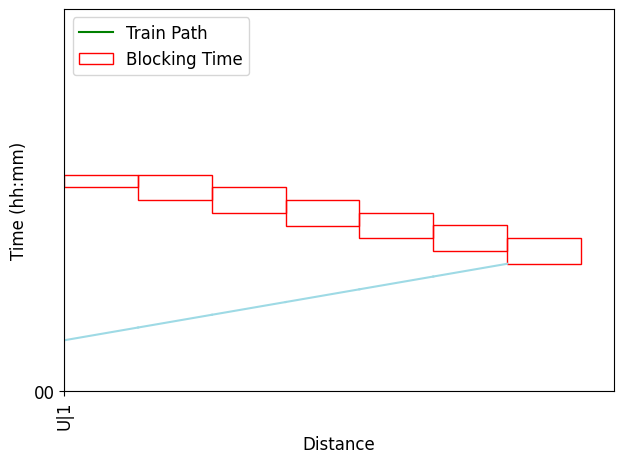

In [76]:
for exp in experiments:
    exp.s.plot(exp.agent.id, exp.block_intervals, exp.buffer_times, exp.recovery_times, True, start="U", end="V", min_y=0, max_y=(30), savefig=f"{save_dir}/blocking_staircase_{exp.metadata['label'].replace(' ', '_')}.png")

In [77]:
def td_str(td):
    return ':'.join(re.split(r'[:.]+', str(td)) [1:3])

def extract_tipping_point(df):
    def apply_func(df):
        result=df.groupby("Delay Location").agg({
            "beta": "max",
            "Delay Amount": "max",
        })
        result["Tipping Point"] = result["beta"].astype(int)
        # result["Tipping Point"] = result["beta"].apply(lambda x: td_str(timedelta(seconds=x)))
        result["Delay"] = result["Delay Amount"].astype(int)
        # result["Delay Amount"] = result["Delay Amount"].apply(lambda x: td_str(timedelta(seconds=x)))
        return result.sort_values("Tipping Point", ascending=True).drop(columns=["beta", "Delay Amount"])

    df["Delay Location"] = df["Delay Location"].str.split("|").apply(lambda x: x[0])
    df = df.groupby(by='Agent').apply(apply_func, include_groups=False)
    return df

tp_df = path_df.rename(columns={
    "delay_amount": "Delay Amount",
    "delay_location": "Delay Location",
    "trainNumber": "Agent",
    "scenario": "Scenario",
    "label": "Label",
})
tp_df["Scenario"] = tp_df["Scenario"].apply(lambda x: x.split(".")[0])
tp_df["Delay Location"] = tp_df["Delay Location"].apply(lambda x: x.split("-")[1])
tp_df = tp_df.groupby(["Scenario"]).apply(extract_tipping_point, include_groups=False)
tp_df

Tipping Point  Delay
Scenario Agent Delay Location                      
         2     s4                          6      0
               s5                          7      2

In [78]:
lines = tp_df.to_latex().split("\n")
i = 0
new_lines = []
while i < len(lines):
    if lines[i] == r'\toprule':
        new_lines.append(lines[i])
        new_lines.append(lines[i+1].replace(r' &  & ', "Agent & Location"))
        i += 2
    elif "begin{tabular}" in lines[i]:
        new_lines.append(r'\begin{tabular}{llrr}')
    elif " & " in lines[i]:
        new_lines.append(r' & '.join(lines[i].split(" & ")[1:]))
    elif "cline" in lines[i]:
        pass
    else:
        new_lines.append(lines[i])
    i += 1
for line in new_lines:
    print(line)
with open(save_dir + "/example_tipping.tex", "w") as f:
    f.write("\n".join(new_lines))

\begin{tabular}{llrr}
\toprule
Agent & Location & Tipping Point & Delay \\
\midrule
\multirow[t]{2}{*}{2} & s4 & 6 & 0 \\
 & s5 & 7 & 2 \\
\bottomrule
\end{tabular}



0 @MAEDeR: 0 - (2.0, 11.0) -- (4.0, 13.0)
0 @MAEDeR: 1 - (17.0, 26.0) -- (27.0, 36.0)
1 FlexSIPP: 0 - (2.0, 11.0) -- (4.0, 13.0)
1 FlexSIPP: 1 - (4.0, 13.0) -- (5.0, 14.0)
1 FlexSIPP: 2 - (5.0, 14.0) -- (6.0, 15.0)
1 FlexSIPP: 3 - (6.0, 15.0) -- (7.0, 16.0)
1 FlexSIPP: 4 - (17.0, 26.0) -- (27.0, 36.0)


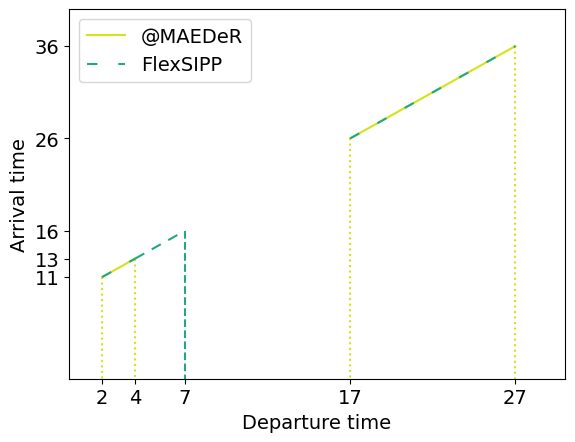

In [173]:
fig, ax = plt.subplots(1, 1)
algorithms = {
    "@MAEDeR": {
        "color": (0.83527, 0.886029, 0.102646),
        "linestyle": '-'
    },
    "FlexSIPP": {
        "color": (0.132268, 0.655014, 0.519661),
        "linestyle": (0, (5, 10))
    }
}
xticks = []
yticks = []
min_font = 14
for i, (alg, param) in enumerate(algorithms.items()):
    atf_df = path_df[path_df["label"] == alg]
    for j, (_, row) in enumerate(atf_df.iterrows()):
        x1 = row["alpha"]
        y1 = row["alpha"] + row["delta"]
        x2 = row["beta"]
        y2 = row["beta"] + row["delta"]
        print(f"{i} {alg}: {j} - {(x1, y1)} -- {(x2, y2)}")
        ax.plot([x1, x2], [y1, y2], color=param["color"], label=alg if j == 0 else '', linestyle=param["linestyle"])
        if alg == "@MAEDeR":
            xticks.append(int(x1))
            xticks.append(int(x2))
            yticks.append(int(y1))
            yticks.append(int(y2))
            ax.plot([x1, x1], [y1, 0], linestyle="dotted", color=param["color"])
            ax.plot([x2, x2], [y2, 0], linestyle="dotted", color=param["color"])
            # ax.annotate(r'\alpha', (x1, y1))
        elif j == 3:
            xticks.append(int(x2))
            yticks.append(int(y2))
            ax.plot([x2, x2], [y2, 0], linestyle="dashed", color=param["color"])
ax.set_ylim(0, 40)
ax.set_xlim(0, 30)
ax.set_xticks(xticks, xticks, fontsize=min_font)
ax.set_yticks(yticks, yticks, fontsize=min_font)
ax.set_ylabel("Arrival time", fontsize=min_font)
ax.set_xlabel("Departure time", fontsize=min_font)
plt.legend(fontsize=min_font)
plt.savefig(save_dir + "/resulting_paths.png")
plt.show()